# T02P02L08 Wrangle And Analyze Data Project

## Contents
* [Project Motivation](#Project-Motivation) 
* [Challenges](#Challenges) 
* [Data Wrangling](#Data-Wrangling)
    * [Gathering](#Gathering)
    * [Assessing](#Assessing)
    * [Cleanning](#Cleanning)
* [Analysis](#Analysis)
* [Conclusion](#Conclusion)

## Project Motivation

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.<BR>Before analysis and visualization, data will be wrangled in the following three main steps:
- Gathering.
- Assessing.
- Cleaning.

## Challenges
[Back to Contents](#Contents)

Collecting the tweets using the twitter API took more than an hour and finally revealed only 1758 entries, so I decided to use the original tweet-json.txt file provided by Udacity to have more data for analysis.

## Data Wrangling

### Gathering
[Back to Contents](#Contents)

In [1]:
# Import Necessary Libraries
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import seaborn as sns
from PIL import Image
from io import BytesIO

In [2]:
#Parameters
file_twt_arch = "twitter_archive_enhanced.csv"
url_img_pred = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_img_pred = "image_predictions.tsv"
file_tweets = "tweet_json_copy.txt" #The file I have extracted using twitter API.
file_tweets_original = "tweet_json.txt" #The original file provided by Udacity.

In [3]:
# Reading twitter-archive-enhanced.csv into a dataframe
df_twitter_arch = pd.read_csv(file_twt_arch)

In [4]:
# Downloading image_predictions file from its URL. 
r = requests.get(url_img_pred)
with open(file_img_pred,'wb') as file:
        file.write(r.content)

In [5]:
#storing image_predictions in a DataFrame
df_img_pred=pd.read_table(file_img_pred)

<a id='twt_api'></a> Gathering data from Twitter

#Twitter API configuration

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

fails_dict = {} 
count = 0
with open(file_tweets, 'w') as file:
    for i in df_img_pred.tweet_id.values:
        count += 1
        print(str(count) + ": " + str(i),end="\r")
        try:
            tweet = api.get_status(i)    
            json.dump(tweet._json,file)
            file.write("\n")
          
        except tweepy.TweepError as te:
            print(te,end="\n\r")
            fails_dict[i] = te
            pass

In [6]:
#Read the tweets json file from the original file provided by Udacity
df_tweet_file=pd.read_json(file_tweets_original,lines=True)
#Tweet Ids are found in extended_entities. Drop any row with null value.
df_tweet_file.dropna(subset = ["extended_entities"], inplace= True)
#extract the tweet ids
df_tweet_file['tweet_id']=\
df_tweet_file.apply(lambda x:int(x.extended_entities['media'][0]['expanded_url'].split("status/")[1].split("/")[0]),axis =1)
#Keep only the tweet_id, favorite_count and retweet_count columns.
df_tweet_file=df_tweet_file[["tweet_id", "favorite_count","retweet_count"]]

### Assessing
[Back to Contents](#Contents)

In [7]:
#Displaying df_twitter_arch for visual assessment
df_twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
#Displaying df_img_pred for visual assessment
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
# Explore a random sample of 5 from df_twitter_arch
df_twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2139,670037189829525505,NaN,NaN,2015-11-27 00:31:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Awesome dog here. Not sure where it is tho. Sp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670037189...,5,10,None,None,None,None,None
572,801285448605831168,NaN,NaN,2016-11-23 04:45:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",oh h*ck 10/10 https://t.co/bC69RrW559,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801285448...,10,10,None,None,None,None,None
1566,687841446767013888,NaN,NaN,2016-01-15 03:39:15 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13/10 I can't stop watching this (vid by @k8ly...,NaN,NaN,NaN,https://vine.co/v/iOWwUPH1hrw,13,10,None,None,None,None,None
1942,673711475735838725,NaN,NaN,2015-12-07 03:51:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673711475...,10,10,None,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None


In [10]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Explore the dogs names for abnormalities
df_twitter_arch.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Bailey         7
Buddy          7
an             7
Toby           7
Dave           6
Bella          6
Scout          6
Oscar          6
Jax            6
Stanley        6
Jack           6
Koda           6
Milo           6
Rusty          6
Leo            6
Alfie          5
            ... 
life           1
Baron          1
Chesney        1
Strudel        1
Arlo           1
Peanut         1
Timofy         1
Bloop          1
Diogi          1
Enchilada      1
Noah           1
Sundance       1
Izzy           1
Nico           1
Cermet         1
Deacon         1
Lassie         1
Lili           1
Mollie         1
Darrel         1
Kial           1
Creg           1
Farfle         1
Barclay        1
Evy            1
Ed             1
Mya            1
Leonidas      

In [12]:
#Is there any decimal ratings?
re_rating_float='(\d+\.\d+/{1}\d+)'
df_twitter_arch.text.str.extractall(re_rating_float)

,,0
,match,
45,0,13.5/10
340,0,9.75/10
695,0,9.75/10
763,0,11.27/10
1689,0,9.5/10
1712,0,11.26/10


In [13]:
# see if there is a pattern in text for extracting the correct names.
pd.set_option('display.max_colwidth', -1) #Display full text
df_twitter_arch[df_twitter_arch.name == "a"]["text"]

56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649     Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq                           
801     Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn               
1002    This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW               
1004    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R                 
1017    This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2                     
1049    This is 

In [14]:
# Explore a random sample of 5 from df_img_pred
df_img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True
1767,826958653328592898,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
872,697990423684476929,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,2,Pembroke,0.984783,True,Cardigan,0.015018,True,Shetland_sheepdog,0.000074,True
599,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,wallaby,0.164215,False,West_Highland_white_terrier,0.093515,True,ashcan,0.067278,False
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True


In [15]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality
##### `Enhanced Twitter Archive`
- Some stages of dogs are missing like Blep and the variation of floof(er). It's a good practice to re-extract all stages again from text.
- `floof` and `floofer` should be the same.
- Retweets should be ommited (drop any row with retweeted_status_id not nan).
- `favorite_count` and `retweet_count` are two valuable information missing from `df_twitter_arch`. I will extract them from the orginal tweets using the twitter API.
- Many names don't represent a dog name like (a:55, the:8, an:7). 
- Missing dogs names (i.e Name = "None"). let's see if we can extract them from text column.
- Some rows are not valid photos for dogs. Drop rows that contain text like "we only rate dogs".
- rating_numerator should be float.
- Wrong rating for tweet ids [883482846933004288, 786709082849828864, 778027034220126208, 680494726643068929]. Correct values = [13.5,9.75,11.27,11.26]



##### `Image Predictions File`
- Ignore tweets that are not detected to have dogs photos. Drop rows where dogs are not identified (i.e p1_dog = False).

#### Tidiness
##### `df_twitter_arch`
- Dog stages should be a single column named stages. The same dog, can't have two different stages at the same time.
- Both `Image Predictions File` should be part of `Enhanced Twitter Archive`.

### Cleanning
[Back to Contents](#Contents)

In [16]:
# Make a backup copy before cleaning procedures
df_twitter_arch_clean = df_twitter_arch.copy()
df_img_pred_clean = df_img_pred.copy()

#### Some stages of dogs are missing like Blep and the variation of floof(er).
#### Dog stages should be a single column named stages.

#### Define

Extract the different dog stages based on the dogtionary using regular expression to a single column named stage. 

#### Code

In [17]:
# regular expression to extract all possible dogs stages from text and store them in a new colunm names "stage"
re_stage='(doggo|floofer|pupper|puppo|blep|snoot|floof)'
df_twitter_arch_clean['stage']=df_twitter_arch_clean.text.str.lower().str.extract(re_stage,expand=True)

#### Test

In [18]:
"pupper:"+str(df_twitter_arch.pupper.value_counts()[1]),"doggo:"+str(df_twitter_arch.doggo.value_counts()[1]),\
"puppo:"+str(df_twitter_arch.puppo.value_counts()[1]),"floofer:"+str(df_twitter_arch.floofer.value_counts()[1])

('pupper:257', 'doggo:97', 'puppo:30', 'floofer:10')

In [19]:
df_twitter_arch_clean.stage.value_counts()

pupper     275
doggo      100
puppo      38 
floof      30 
floofer    8  
blep       3  
Name: stage, dtype: int64

In [20]:
# Explore a random sample
df_twitter_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
466,817171292965273600,NaN,NaN,2017-01-06 00:49:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tebow. He kindly requests that you put down the coffee and play with him. 13/10 such a good boy https://t.co/56uBP28eqw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817171292965273600/photo/1,13,10,Tebow,None,None,None,None,NaN
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: When she says you're a good boy and you know you're a good boy because you're a good boy. 13/10 https://t.co/O5IUmRHRIh,7.916723e+17,4.196984e+09,2016-10-27 16:06:04 +0000,"https://twitter.com/dog_rates/status/791672322847637504/photo/1,https://twitter.com/dog_rates/status/791672322847637504/photo/1",13,10,None,None,None,None,None,NaN
1641,684122891630342144,NaN,NaN,2016-01-04 21:23:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Heartwarming scene of two pups that want nothing more than to be together. Touching af. Great tongue. Both 11/10 https://t.co/k32mSlRx0j,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684122891630342144/photo/1,11,10,None,None,None,None,None,NaN
186,856288084350160898,8.562860e+17,279280991.0,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None,NaN
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,"https://twitter.com/katieornah/status/771002130450743296/photo/1,https://twitter.com/katieornah/status/771002130450743296/photo/1",12,10,None,None,None,pupper,None,pupper


In [21]:
# Verify a random entry
df_twitter_arch_clean.iloc[1367]

tweet_id                      702598099714314240                                                                                                                  
in_reply_to_status_id         NaN                                                                                                                                 
in_reply_to_user_id           NaN                                                                                                                                 
timestamp                     2016-02-24 20:56:55 +0000                                                                                                           
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                  
text                          This is Sansa. She's gotten too big for her chair. Not so smol anymore. 11/10 once a pupper, always a pupper https://t.co/IpAoztle2s
retweeted_status_id   

In [22]:
# Verify another sample from blep stage
df_twitter_arch_clean[df_twitter_arch_clean.stage=='blep'][["text","stage"]].head()

,text,stage
61,Meet Jesse. He's a Fetty Woof. His tongue ejects without warning. A true bleptomaniac. 12/10 would snug well https://t.co/fUod0tVmvK,blep
139,This is Sammy. Her tongue ejects without warning sometimes. It's a serious condition. Needs a hefty dose from a BlepiPen. 13/10 https://t.co/g20EmqK7vc,blep
523,"I call this one ""A Blep by the Sea"" 12/10 https://t.co/EMdnCugNbo",blep


#### `floof` and `floofer` should be the same.

#### Define

Replace each floofer by floof.

#### Code

In [23]:
# keep a reference to compare with
before = df_twitter_arch_clean.stage.value_counts()

In [24]:
df_twitter_arch_clean['stage']=df_twitter_arch_clean['stage'].replace("floofer","floof")

#### Test

In [25]:
before

pupper     275
doggo      100
puppo      38 
floof      30 
floofer    8  
blep       3  
Name: stage, dtype: int64

In [26]:
df_twitter_arch_clean.stage.value_counts()

pupper    275
doggo     100
floof     38 
puppo     38 
blep      3  
Name: stage, dtype: int64

#### Retweets should be ommited

#### Define

Drop any row with retweeted_status_id not nan

#### Code

In [27]:
# get indices for retweets
retweet_index = df_twitter_arch_clean[df_twitter_arch_clean.retweeted_status_id.notnull()].index.tolist()

In [28]:
# drop them
df_twitter_arch_clean.drop(index = retweet_index,inplace=True)

#### Test

In [29]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                         415 non-

#### `favorite_count` and `retweet_count` are two valuable information missing from df_twitter_arch. 

#### Define

Collect the original tweets using twitter API and extract `favorite_count` and `retweet_count`, then merge df_twitter_arch_clean.
> Note: Collection and extraction was already done during gathering phase [here](#twt_api)

#### Code

In [30]:
# Merge df_twitter_arch_clean with df_tweet_file
df_twitter_arch_clean=pd.merge(df_twitter_arch_clean,df_tweet_file,on="tweet_id")

#### Test

In [31]:
df_twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,NaN,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,NaN,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,NaN,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,NaN,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,NaN,41048,9774


#### Many names don't represent a dog name like (a:55, the:8, an:7). 
#### Missing dogs names (i.e Name = "None"). let's see if we can extract them from text column.

#### Define

Visual inspection of the columns `name` for the wrong values like `a` revealed a pattern in writing the dogs name like `... named xxx.` or `His name is ....`. So I will use regex to collect these names and it worked also fine for some of the missing names (i.e `None`)

#### Code

In [32]:
# get the indices of the observed invalid names.
invalid_names = ["None","a","an","the"]
index_invalid = df_twitter_arch_clean[df_twitter_arch_clean.name.isin(invalid_names)].index

In [33]:
# Keep a reference of the original counts.
before = df_twitter_arch_clean.name[index_invalid].value_counts()

In [34]:
# Extract the name that follows any of the following phrases "named" and "His name is". 
# Then replace the existing name column values with the new values. 
re_stage='(named|His name is) ([a-zA-Z]+).'
mask = df_twitter_arch_clean.name.isin(invalid_names)
z_valid = df_twitter_arch_clean[mask]
df_twitter_arch_clean.loc[mask, 'name'] = z_valid['text'].str.extract(re_stage,expand=True)[1]

#### Test

In [35]:
# Result before cleaning
before

None    563
a       55 
an      7  
the     7  
Name: name, dtype: int64

In [36]:
# Result after cleaning
df_twitter_arch_clean.name[index_invalid].value_counts()

Tickles      2
Pepe         1
Johm         1
Cherokee     1
Guss         1
Alphred      1
Rufus        1
Octaviath    1
Leroi        1
Jessiga      1
Berta        1
Jacob        1
Hemry        1
Big          1
Alfredo      1
Klint        1
Cheryl       1
Zeus         1
Chuk         1
Kohl         1
Alfonso      1
Kip          1
Daryl        1
Spork        1
Wylie        1
Name: name, dtype: int64

In [37]:
sum(df_twitter_arch_clean.name[index_invalid].value_counts())

26

#### - Some rows are not valid photos for dogs.

#### Define

Drop rows that contain text like "we only rate dogs".

#### Code

In [38]:
df_twitter_arch_clean.drop(index = 
                           df_twitter_arch_clean[df_twitter_arch_clean.text.apply(lambda x: "we only rate dogs" in x.lower())].index, 
                           axis=1, inplace = True)

#### Test

In [39]:
sum(df_twitter_arch_clean.text.apply(lambda x: "we only rate dogs" in x.lower()))

0

#### - rating_numerator should be float type

#### Define

Modify the rating_numerator type from integer to float.

#### Code

In [40]:
df_twitter_arch_clean.rating_numerator=pd.to_numeric(df_twitter_arch_clean.rating_numerator,downcast='float')

#### Test

In [41]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2058
Data columns (total 20 columns):
tweet_id                      2002 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2002 non-null object
source                        2002 non-null object
text                          2002 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2002 non-null object
rating_numerator              2002 non-null float32
rating_denominator            2002 non-null int64
name                          1441 non-null object
doggo                         2002 non-null object
floofer                       2002 non-null object
pupper                        2002 non-null object
puppo                         2002 non-null object
stage                         381 no

#### - Wrong rating_numerator for tweet ids [883482846933004288, 786709082849828864, 778027034220126208, 680494726643068929]. Correct values = [13.5,9.75,11.27,11.26]

#### Define

Modify the rating_numerator for tweet ids [883482846933004288, 786709082849828864, 778027034220126208, 680494726643068929] to [13.5,9.75,11.27,11.26].

#### Code

In [42]:
i_temp = df_twitter_arch_clean[df_twitter_arch_clean.tweet_id.isin(
    [883482846933004288, 786709082849828864, 778027034220126208, 680494726643068929])].index.tolist()

In [43]:
values_temp = [13.5,9.75,11.27,11.26]

In [44]:
for i in range(0,4):
    df_twitter_arch_clean.at[i_temp[i],'rating_numerator']=values_temp[i]

#### Test

In [45]:
df_twitter_arch_clean.loc[i_temp]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,favorite_count,retweet_count
39,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,None,None,None,None,NaN,46860,10407
527,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None,NaN,20296,7069
584,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,None,None,pupper,None,pupper,7320,1885
1428,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,None,None,None,None,pupper,1879,542


##### `Image Predictions File`
- Ignore tweets that are not detected to have dogs photos.

#### Define

Drop rows where dogs are not identified (i.e p1_dog = False).

#### Code

In [46]:
df_img_pred_clean.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [47]:
df_img_pred_clean.drop(index=df_img_pred_clean[df_img_pred_clean.p1_dog==False].index,inplace=True)

#### Test

In [48]:
df_img_pred_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

#### Tidiness
##### `df_twitter_arch`
##### - Dog stages should be a single column named stages. The same dog, can't have two different stages at the same time.

#### Define

Drop the columns ["doggo","floofer","pupper","puppo"]. Stages are now stored in the "stage" column

#### Code

In [49]:
df_twitter_arch_clean.drop(columns=["doggo","floofer","pupper","puppo"],inplace=True)

#### Test

In [50]:
df_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2058
Data columns (total 16 columns):
tweet_id                      2002 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2002 non-null object
source                        2002 non-null object
text                          2002 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2002 non-null object
rating_numerator              2002 non-null float32
rating_denominator            2002 non-null int64
name                          1441 non-null object
stage                         381 non-null object
favorite_count                2002 non-null int64
retweet_count                 2002 non-null int64
dtypes: float32(1), float64(4), int64(4), object(7)
memory usage: 338.1+ KB


#### - Both `Image Predictions File` should be part of `Enhanced Twitter Archive`.

#### Define

Join  `df_twitter_arch_clean` and `df_img_pred_clean` using "tweet_id"

#### Code

In [51]:
df_final = pd.merge(df_twitter_arch_clean,df_img_pred_clean,on="tweet_id")

#### Test

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 1481
Data columns (total 27 columns):
tweet_id                      1482 non-null int64
in_reply_to_status_id         13 non-null float64
in_reply_to_user_id           13 non-null float64
timestamp                     1482 non-null object
source                        1482 non-null object
text                          1482 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1482 non-null object
rating_numerator              1482 non-null float32
rating_denominator            1482 non-null int64
name                          1111 non-null object
stage                         286 non-null object
favorite_count                1482 non-null int64
retweet_count                 1482 non-null int64
jpg_url                       1482 non-null object
img_num                       1482 non-

In [53]:
#Saving the cleaned dataset to a csv file
df_final.to_csv("twitter_archive_master.csv",index=False)

## Analysis
[Back to Contents](#Contents)

In [54]:
#reading the cleaned dataset and storing it into a dataframe for analysis
df_final= pd.read_csv("twitter_archive_master.csv")

In [55]:
# **Feature Engineering**
#Calculate rating
df_final["rating"] = df_final.apply(lambda x:round(x.rating_numerator/x.rating_denominator,2),axis = 1)
#Defining a new parameter named "likability" = rating*(retweet_count + favorite_count)
df_final["likability"] = df_final.rating*(df_final.retweet_count+df_final.favorite_count)

In [56]:
#Keeping only columns needed for analysis.
df_final = df_final[["tweet_id","name","stage","p1","rating","likability","favorite_count","retweet_count","jpg_url","text"]]

In [57]:
#Rename p1 to breed
df_final.rename(columns={"p1":"breed"},inplace=True)

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 10 columns):
tweet_id          1482 non-null int64
name              1111 non-null object
stage             286 non-null object
breed             1482 non-null object
rating            1482 non-null float64
likability        1482 non-null float64
favorite_count    1482 non-null int64
retweet_count     1482 non-null int64
jpg_url           1482 non-null object
text              1482 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 115.9+ KB


In [59]:
df_final.describe()

,tweet_id,rating,likability,favorite_count,retweet_count
count,1.482000e+03,1482.000000,1482.000000,1482.000000,1482.000000
mean,7.404168e+17,1.097186,14044.903239,8787.593792,2931.371795
std,6.798528e+16,0.180846,21756.169931,12400.832331,5089.516426
min,6.660209e+17,0.200000,76.000000,0.000000,16.000000
25%,6.777488e+17,1.000000,2872.100000,1856.250000,661.000000
50%,7.158126e+17,1.100000,6143.800000,4148.000000,1481.500000
75%,7.932827e+17,1.200000,17018.850000,11181.500000,3443.750000
max,8.921774e+17,3.430000,273767.000000,132810.000000,79515.000000


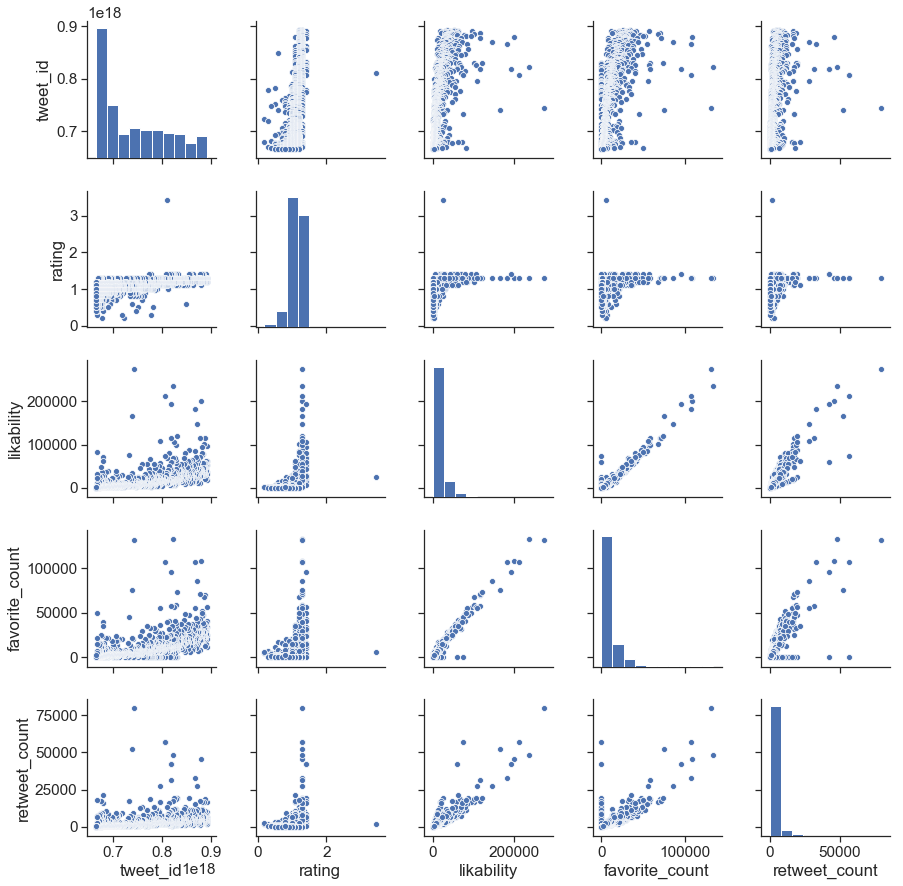

In [60]:
# Plotting a scatter plot matrix to explore relationships between features. 
sns.set(style="ticks",font_scale=1.4)
df = df_final
sns.pairplot(df);

In [61]:
# Explore the text of the most likable posts.
df_final.iloc[df_final.likability.sort_values(ascending=False).head(5).index.tolist()].text

626    Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
240    Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc    
317    This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d                              
49     This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY         
260    This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1        
Name: text, dtype: object

In [62]:
# Get indices for most likable, best rated, most viral (retweeted), and most rated dog's post.
i_most_likable = df_final.likability.sort_values(ascending=False).head(1).index
i_best_rating = df_final.rating.sort_values(ascending=False).head(2).index #skip the first rank as it uses a wrong rating.
i_most_reachable = df_final.retweet_count.sort_values(ascending=False).head(1).index
i_most_favored =  df_final.favorite_count.sort_values(ascending=False).head(1).index

In [63]:
most_favored = df_final.iloc[i_most_favored]
most_favored

,tweet_id,name,stage,breed,rating,likability,favorite_count,retweet_count,jpg_url,text
240,822872901745569793,NaN,puppo,Lakeland_terrier,1.3,235397.5,132810,48265,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


In [64]:
most_likable = df_final.iloc[i_most_likable]
most_likable

,tweet_id,name,stage,breed,rating,likability,favorite_count,retweet_count,jpg_url,text
626,744234799360020481,NaN,doggo,Labrador_retriever,1.3,273767.0,131075,79515,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


In [65]:
most_reachable = df_final.iloc[i_most_reachable]
most_reachable

,tweet_id,name,stage,breed,rating,likability,favorite_count,retweet_count,jpg_url,text
626,744234799360020481,NaN,doggo,Labrador_retriever,1.3,273767.0,131075,79515,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


In [66]:
best_rated = df_final.iloc[i_best_rating]
best_rated = best_rated.drop(index = 303)
#replace existing image with a better one, rather than hardcoding, it can be retreived programatically using twitter API
best_rated.jpg_url="https://pbs.twimg.com/media/CzU_YVGUoAA1Bla.jpg" 
best_rated

,tweet_id,name,stage,breed,rating,likability,favorite_count,retweet_count,jpg_url,text
315,807621403335917568,Ollie,pupper,golden_retriever,1.4,28733.6,16236,4288,https://pbs.twimg.com/media/CzU_YVGUoAA1Bla.jpg,This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie https://t.co/qTRY2qX9y4


In [67]:
def get_img (df,twt_i):
#Get the image of the dog
    response = requests.get(df.loc[twt_i].jpg_url)
    img= Image.open(BytesIO(response.content))
    #Adjust image size
    baseheight = 500
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((wsize, baseheight), Image.ANTIALIAS)
    return img

## Conclusion
[Back to Contents](#Contents)

### Insights

The most favoured dog is a Lakeland Terrier puppo.


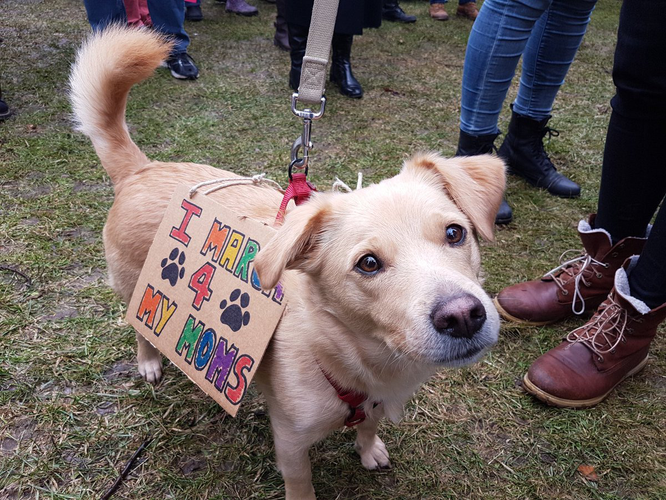

In [68]:
temp = most_favored
print("The most favoured dog is a {} {}."\
      .format(temp.breed.values[0].replace("_"," ").title(),temp.stage.values[0],temp.name.values[0]))
get_img(temp,temp.index[0])

The most likable dog is a Labrador Retriever doggo.


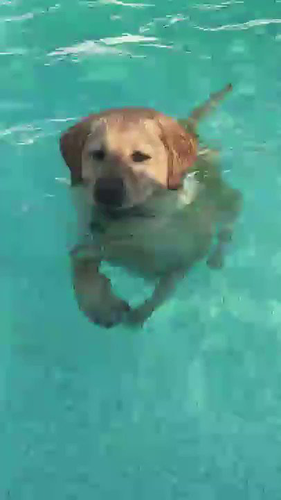

In [69]:
temp = most_likable
print("The most likable dog is a {} {}."\
      .format(temp.breed.values[0].replace("_"," ").title(),temp.stage.values[0],temp.name.values[0]))
get_img(temp,temp.index[0])

The best rated dog is a Golden Retriever named Ollie.


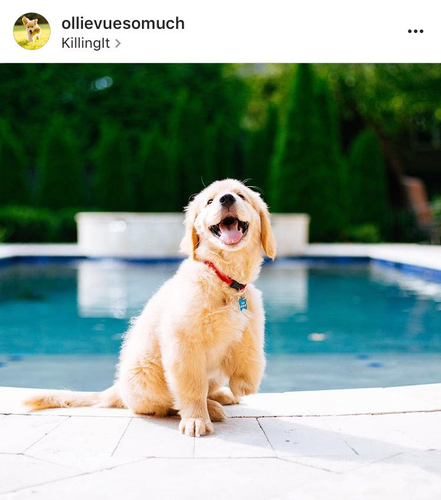

In [70]:
temp = best_rated
print("The best rated dog is a {} named {}."\
      .format(temp.breed.values[0].replace("_"," ").title(),temp.name.values[0]))
get_img(temp,temp.index[0])

In [71]:
df_final.name.value_counts().head(5).rename_axis("name").reset_index(name="count")

,name,count
0,Cooper,10
1,Charlie,10
2,Oliver,9
3,Tucker,9
4,Penny,8


### Visualizations

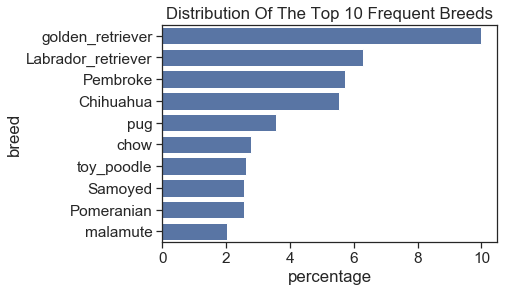

In [72]:
# potting the percentage distribution of the 10 most frequent breeds
# get the list of the most frequent breeds in the dataset
most_frequent = df_final.breed.value_counts().head(10).index.tolist()
# add a new category and group minority breeds to "others"
df_final['breed_grouping']=df_final.breed.apply(lambda x:x if x in most_frequent else "others")
# build a new dataset for percentage distribution 
perc_dist= df_final.breed_grouping.value_counts()/df_final.count()[0]*100
# exclude others
perc_dist=perc_dist[1:].rename_axis("breed").reset_index(name="percentage")
# plot distribution
sns.barplot(x="percentage", y="breed", data=perc_dist, color="b").set_title("Distribution Of The Top 10 Frequent Breeds");

In [73]:
perc_dist

,breed,percentage
0,golden_retriever,9.986505
1,Labrador_retriever,6.275304
2,Pembroke,5.735493
3,Chihuahua,5.533063
4,pug,3.576248
5,chow,2.766532
6,toy_poodle,2.631579
7,Samoyed,2.564103
8,Pomeranian,2.564103
9,malamute,2.024291


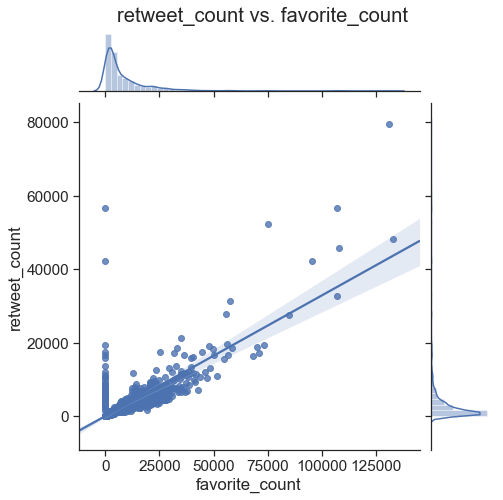

In [74]:
g= sns.jointplot("favorite_count", "retweet_count", data=df_final, kind="reg",color="b", height=7)
g.fig.suptitle("retweet_count vs. favorite_count",y=1);